<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر بیگی
</font>
<p></p>
<br>
<font>
<b>تمرین سوم</b>
</font>
<br>
<br>
موعد تحویل: ۴ دی <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<span style="color: red;">
<div dir='rtl'>

<b> نام و نام‌‌خانوادگی: علی جوانی</b>
<!-- YOUR NAME HERE -->

<b> شماره دانشجویی: 97105028</b>
<!-- YOUR STUDENT ID HERE -->

<b> لینک colab: </b>

<href>https://drive.google.com/file/d/19BLiLuzyw2aMWSQh2ZxOkHrwjftLIPFD/view?usp=sharing</href>

<h4 dir="rtl">
دقت کنید که توضیحات سوالات مطابق خروجی هایی است که روی همین
notebook
گرفتم و نوت بوکی که روی
colab
است را یک بار دیگر ران گرفتم و خروجی های آن کمی متفاوت است پس ممکن است در بعضی موارد خورجی های
notebook
روی
colab
با توضیحاتش مطابق نباشد
</h4>

<!-- UPLOAD YOUR NOTEBOOK TO GOOGLE COLAB AND MAKE SURE TO RUN ALL OF ITS CELLS -->
</div>
</span>

<div dir='rtl'>
<h1> 
مقدمه
</h1>
<p>
در این تمرین قصد داریم به مباحث زیر بپردازیم:
<li> embedding </li>
<li> کلاسه‌بندی متن </li>
<li> کاهش ابعاد </li>
<li> خوشه‌بندی متن و هرس‌کردن خوشه‌ها</li>

دیتاست این تمرین از دیتاست‌های kaggle انتخاب شده‌است و لینک آن در بخش اول تمرین در اختیار شما قرار داده شده است.

کتابخانه‌های مورد نظرتان را هم می‌توانید در اولین سل نوت‌بوک فراخوانی کنید. 
</p>
</div>

In [3]:
import opendatasets as od
import kaggle
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm.notebook import tqdm
import fasttext
import sklearn, sklearn.decomposition, sklearn.naive_bayes
import re
import os
import matplotlib.pyplot as plt

<div dir='rtl'>
<h1>1.
دریافت و آماده‌سازی دیتاست
</h1>
<p>
دیتاست استفاده شده در این تمرین، مجموعه‌ای عناوین، خلاصه، و ژانر چندین کتاب است. 
این دیتاست در kaggle موجود است. 
ابتدا این دیتاست را با استفاده از kaggle api دریافت کنید و سپس آن را لود کنید.
<br/>
لینک دیتاست: https://www.kaggle.com/datasets/athu1105/book-genre-prediction
<br>
<i>در صورتی که با خطای 443 مواجه شدید، یا از پراکسی استفاده کنید یا از کولب.</i>
</p>
</div>

In [4]:
# TODO: Download Dataset (https://www.kaggle.com/datasets/athu1105/book-genre-prediction) Using Kaggle API

# kaggle.api.authenticate()

# kaggle.api.dataset_download_files('athu1105/book-genre-prediction', path='./data', unzip=True)

In [5]:
# TODO: Load Dataset into df

df = pd.read_csv('./data/data.csv', index_col='index')
df.head()

,title,genre,summary
index,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [6]:
# TODO: Perform data cleaning and eda (you can add cells here)

print(
f"""
title duplicates: {df.duplicated(subset=['title']).sum()}
genre duplicates: {df.duplicated(subset=['genre']).sum()}
summary duplicates: {df.duplicated(subset=['summary']).sum()}
"""
)
df.drop_duplicates(inplace=True)
print(
f"""
title duplicates: {df.duplicated(subset=['title']).sum()}
genre duplicates: {df.duplicated(subset=['genre']).sum()}
summary duplicates: {df.duplicated(subset=['summary']).sum()}
"""
)

# seperators = [',', ' ', ';', '&', '|', '/', '#', '\\']
# for sep in seperators:
#     if df.title.apply(lambda x: sep in x).sum() + df.genre.apply(lambda x: sep in x).sum() == 0:
#       break  
# print('sepratro is: ', sep)


# df = df.groupby(['summary']).agg({'title': sep.join, 'genre': sep.join}).reset_index()
# print(
# f"""
# title duplicates: {df.duplicated(subset=['title']).sum()}
# genre duplicates: {df.duplicated(subset=['genre']).sum()}
# summary duplicates: {df.duplicated(subset=['summary']).sum()}
# """
# )
df.head()


title duplicates: 361
genre duplicates: 4647
summary duplicates: 115


title duplicates: 344
genre duplicates: 4630
summary duplicates: 98



,title,genre,summary
index,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


<div dir='rtl'>
<p>
حال در این مرحله، به پیش‌پردازش متن می‌پردازیم. این پیش‌پردازش باید روی هر دو ستون title و summary اعمال شود.
برای پیش‌پردازش نیازی نیست که هرکدام از اعمال پیش‌پردازش را خودتان مانند تمارین قبل پیاده کنید. برای پیاده‌سازی تابع زیر می‌توانید از کتابخانه‌های معمول برای این کار بهره ببرید.
</p>
</div>

In [7]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

def preprocess_text(text: str, minimum_length=1, stopword_removal=True, stopwords_domain=nltk.corpus.stopwords.words('english'), lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    
    # TODO: Tokenize text
    if lower_case:
        text = text.lower()
    re.sub(r"https?\S+", "", text)
    if punctuation_removal:
        text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    
    # TODO: Preprocess tokenized text
    if stopword_removal:
        tokens = [token for token in tokens if token not in stopwords_domain]
    tokens = [token for token in tokens if len(token) >= minimum_length]
    
    return tokens

[nltk_data] Downloading package punkt to /home/ali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
# TODO: Apply preprocess text on both title and summary columns

title_tokens = df.title.apply(preprocess_text)
summery_tokens = df.summary.apply(preprocess_text)

<div dir="rtl">
در نهایت بعد از اپلای کردن پیش‌پردازش روی هر دو ستون، دو ستون پیش‌پردازش شده را با هم ادغام کنید و آن را در یک آرایه به نام X قرار دهید.
</div>

In [9]:
# TODO: Merge preprocessed columns

X = title_tokens + summery_tokens
print(len(X))
X.head()

4640


index
0    [drowned, wednesday, drowned, wednesday, first...
1    [lost, hero, book, opens, jason, awakens, scho...
2    [eyes, overworld, cugel, easily, persuaded, me...
3    [magics, promise, book, opens, heraldmage, van...
4    [taran, wanderer, taran, gurgi, returned, caer...
dtype: object

<div dir="rtl">
<h2>1-1.
Embedding
</h2>

در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر کتاب برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
</div>

In [10]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        """
        method: str {'skipgram', 'cbow'}
        """
        self.method = method
        self.model = None
        self.preprocessor = preprocessor
        self.embeding_matrix = None

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        # TODO
        with open('fasttext.txt', 'w') as f:
            for text in texts:
                f.write(' '.join(text) + '\n')
        self.model = fasttext.train_unsupervised('fasttext.txt', model=self.method)
        os.remove('fasttext.txt')     

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        # TODO
        if self.embeding_matrix is None:
            self.embeding_matrix = np.zeros((tf_idf_vectorizer.get_feature_names_out().shape[0], self.model.get_dimension()))
            for index, word in enumerate(tf_idf_vectorizer.get_feature_names_out()):
                self.embeding_matrix[index] = self.model.get_word_vector(word)
        if self.preprocessor:
            query = self.preprocessor(query)
        query_tf_idf = tf_idf_vectorizer.transform([' '.join(query)])[0]
        
        embedding = self.embeding_matrix[query_tf_idf.indices] * query_tf_idf.data[:, np.newaxis]
        return embedding.sum(axis=0) / query_tf_idf.data.sum()
        
    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [11]:
# TODO: Train fasttext on X

fasttext_model = FastText(method='skipgram')
fasttext_model.prepare(X.to_list(), mode='train', save=True)

Read 0M words
Number of words:  20603
Number of labels: 0
Progress: 100.0% words/sec/thread:   28144 lr:  0.000000 avg.loss:  2.342600 ETA:   0h 0m 0s


In [12]:
# TODO: Get nearest neighbors of an arbitrary word using fasttext

fasttext_model.model.get_nearest_neighbors('animal')

[(0.9236459732055664, 'animals'),
 (0.8018755912780762, 'animate'),
 (0.7961367964744568, 'animator'),
 (0.7340022921562195, 'anthropomorphic'),
 (0.7208380699157715, 'animated'),
 (0.6989076733589172, 'metamorphosis'),
 (0.6759529113769531, 'zombielike'),
 (0.6733537316322327, 'zoo'),
 (0.6717545390129089, 'birds'),
 (0.6679652333259583, 'females')]

<div dir="rtl">
در این مرحله آرایه X را روی TFIDF فیت می‌کنیم.
</div>

In [13]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer(norm=None)

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        # TODO
        documents = [' '.join(text) for text in data]
        self.vectorizer.fit(documents)

In [14]:
# TODO: Fit TFIDF Vectorizer on X

tf_idf = TF_IDF()
tf_idf.fit_vectorizer(X.to_list())

In [15]:
# TODO: Get Embedding of an arbitrary query using your prior implemention

query = 'animals are cute and they are very friendly'
fasttext_model.preprocessor = preprocess_text
print(fasttext_model.get_query_embedding(query, tf_idf.vectorizer))
fasttext_model.preprocessor = None

[-8.28605036e-02  7.29424933e-02 -3.90486571e-01 -3.91625096e-01
  5.91254104e-01 -3.74003582e-01 -1.49342379e-01  3.70643164e-01
  1.66479967e-01  1.24758565e-01 -2.83698262e-01 -6.94030898e-02
 -7.09811301e-02  5.05548151e-02 -7.04600499e-02  2.62068334e-01
  7.25262797e-02  1.08297668e-01 -7.85959392e-02 -2.52196669e-01
 -1.53030201e-01  2.36989221e-02  1.11600012e-01  9.12365695e-02
  5.07052998e-02  2.51353384e-01  1.38236273e-01  8.79027367e-03
 -1.70553680e-01  1.27625436e-02 -2.54236274e-01  7.20363125e-02
 -2.29610422e-01 -1.37972190e-01 -4.10642450e-02  8.98425821e-02
 -1.24946539e-01 -6.83754228e-01 -2.18557657e-01  2.36485314e-02
 -1.24715916e-01 -6.33690875e-02  1.02461106e-01  1.48045597e-01
  1.18880484e-01  5.18051014e-02 -2.23429586e-01 -7.80311367e-02
 -2.73246184e-02  5.41709263e-02 -2.45958068e-01 -5.18874137e-02
 -9.91745604e-03  4.34135209e-02 -1.98992719e-01 -3.16240401e-01
 -3.29519034e-01  3.52394319e-01 -8.31914203e-02 -2.42034594e-01
  9.16276786e-02  1.70078

<div dir="rtl">
در نهایت، تمامی entry های درون X را به صورت امبدینگ دربیاورید و آن را در X ذخیره کنید.
</div>

In [16]:
# TODO: Get embedding on each document in X

for index in tqdm(X.index, total=len(X.index)):
    X[index] = fasttext_model.get_query_embedding(X[index], tf_idf.vectorizer)    
X.head()

  0%|          | 0/4640 [00:00<?, ?it/s]

index
0    [-0.07151083559255741, -0.012655504261920811, ...
1    [-0.07496768904280275, -0.04645226501194093, -...
2    [-0.07171169259217446, 0.001809469488586981, -...
3    [-0.10162222899561783, -0.06575196291229221, -...
4    [-0.07317496855417394, -0.04435590799071074, -...
dtype: object

<div dir='rtl'>
<h2>1-2. 
آماده‌سازی داده تمرین و تست
</h2>
<p>
در این بخش ابتدا می‌خواهیم تا داده‌ای که می‌خواهیم بر اساس آن کلاسه‌بندی کتاب‌ها را انجام دهیم، که همان ژانر کتاب‌ها است را انکود کنیم.
<br>
سپس با جداسازی داده آموزش و تست، به آموزش مدل‌های کلاسه‌بند می‌پردازیم.
</p>
</div>

In [17]:
# TODO: Encode genres with values between 0 and n_classes-1 and save it in array Y

Y = df.genre.astype('category').cat.codes
Y.head()

index
0    1
1    1
2    1
3    1
4    1
dtype: int8

In [18]:
# TODO: Split data into train and test (test size = 20%)

test_size = 0.2

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(np.array(X.to_list()), np.array(Y.to_list()), test_size=test_size, random_state=42)

<div dir="rtl">
<h1>2. 
کلاسه‌بندی متن
</h1>
در این بخش می‌خواهیم تا با استفاده از داده‌هایی که داریم، سه مدل کلاسه‌بندی متن را آموزش دهیم و عملکرد آن‌ها را با هم مقایسه کنیم.
</div>

<div dir="rtl">
<h2>2-1. 
SVM و Naive Bayes
</h2>
با استفاده از توابع آماده در sklearn، کلاسه‌بند SVM و Naive Bayes را روی داده آموزش تمرین دهید. سپس، ژانر داده تست را با استفاده از مدل آموزش داده شده پیش‌بینی کنید و آن را در آرایه‌های NB_prediction و SVM_prediction ذخیره کنید.</div>

In [19]:
# TODO: Train Sklearn's SVM and Naive Bayes implementation on X_train and Y_train

svm = sklearn.svm.SVC()
svm.fit(X_train, Y_train)

naive_bayes = sklearn.naive_bayes.GaussianNB()
naive_bayes.fit(X_train, Y_train);

In [20]:
# TODO: Predict on X_test using the trained models

SVM_prediction = svm.predict(X_test)
NB_prediction = naive_bayes.predict(X_test)

<div dir="rtl">
<h2>2-2.  
Rocchio
</h2>
می‌خواهیم روش Rocchio را از
پایه پیاده‌سازی کنیم.
با توجه به شواهد نوشته شده هر تابع را کامل کنید و با آموزش مدل روی داده‌های train
لیبل‌های داده‌های test
را پیش بینی کنید و آن را در rocchio_prediction ذخیره کنید.
</div>

In [21]:
class RocchioTextClassifier:
    def __init__(self, preprocessor=None):
        self.preprocessor = preprocessor
        self.centroids = None
    
    def calculate_centroids(self, X, y):
        """
        Calculates the centroids of each class in the dataset. A centroid is defined as the mean vector of all the feature vectors in a class.

        Parameters
        ----------
        X : np.ndarray
            An array contaning the feature vectors of each sentence.

        y : np.ndarray
            An array containing the class labels for each feature vector in X.

        Sets self.centeroids as a dictionary where keys are unique class labels from 'y', and values are the calculated centroids (mean vectors) for each class.
        """
        self.centroids = pd.DataFrame()
        # TODO
        for label in np.unique(y):
            self.centroids = pd.concat([self.centroids, pd.Series(np.mean(X_train[Y_train == label], axis=0), name=label).to_frame().T])
        
    def predict_label(self, x):
        """
        Classifies a new instance by finding the class whose centroid is closest to the new instance's vector.

        Parameters
        ----------
        X : np.ndarray
            An array of a new instance to be classified.

        Returns
        -------
        object
            The predicted label for the input.
        """
        # TODO
        dist = self.centroids.values - x[np.newaxis, :]
        min_idx = np.argmin((dist * dist).sum(axis=1))
        label = self.centroids.index[min_idx]
        return label
    
    def predict(self, X):
        """
        Classifies the array X

        Parameters
        ----------
        X : np.ndarray
            An array of new instances to be classified.

        Returns
        -------
        object
            The predicted label for each input.
        """
        return np.array([self.predict_label(x) for x in X])

In [22]:
# TODO: Train your Rocchio implementation on X_train and Y_train

rocchio = RocchioTextClassifier()
rocchio.calculate_centroids(X_train, Y_train)

In [23]:
# TODO: Predict on X_test using the trained model

rocchio_prediction = rocchio.predict(X_test)

<div dir="rtl">
<h2>2-3. 
ارزیابی
</h2>
برای هر سه روش پیاده‌سازی شده، معیار‌های ارزیابی زیر را بررسی کنید.
<br>
f1 score, accuracy, precision, recall
<br>
سپس، نتایج به دست آمده را با هم در چهار نمودار مقایسه کنید.
</div>

In [24]:
# TODO: Run evaluation metrics on the predictions

def precision(y_true, y_pred):
    return sklearn.metrics.precision_score(y_true, y_pred, average='macro', zero_division=1)

def recall(y_true, y_pred):
    return sklearn.metrics.recall_score(y_true, y_pred, average='macro', zero_division=1)

def accuracy(y_true, y_pred):
    return sklearn.metrics.accuracy_score(y_true, y_pred)

def f1_score(y_true, y_pred):
    return sklearn.metrics.f1_score(y_true, y_pred, average='macro', zero_division=1)

print(
f"""
SVM:
    precision: {precision(Y_test, SVM_prediction):.2f}
    recall: {recall(Y_test, SVM_prediction):.2f}
    accuracy: {accuracy(Y_test, SVM_prediction):.2f}
    f1_score: {f1_score(Y_test, SVM_prediction):.2f}
Naive Bayes:
    precision: {precision(Y_test, NB_prediction):.2f}
    recall: {recall(Y_test, NB_prediction):.2f}
    accuracy: {accuracy(Y_test, NB_prediction):.2f}
    f1_score: {f1_score(Y_test, NB_prediction):.2f}
Rocchio:
    precision: {precision(Y_test, rocchio_prediction):.5f}
    recall: {recall(Y_test, rocchio_prediction):.5f}
    accuracy: {accuracy(Y_test, rocchio_prediction):.5f}
    f1_score: {f1_score(Y_test, rocchio_prediction):.5f}
"""
)



SVM:
    precision: 0.75
    recall: 0.52
    accuracy: 0.67
    f1_score: 0.54
Naive Bayes:
    precision: 0.48
    recall: 0.62
    accuracy: 0.54
    f1_score: 0.50
Rocchio:
    precision: 0.47150
    recall: 0.62092
    accuracy: 0.52371
    f1_score: 0.48358



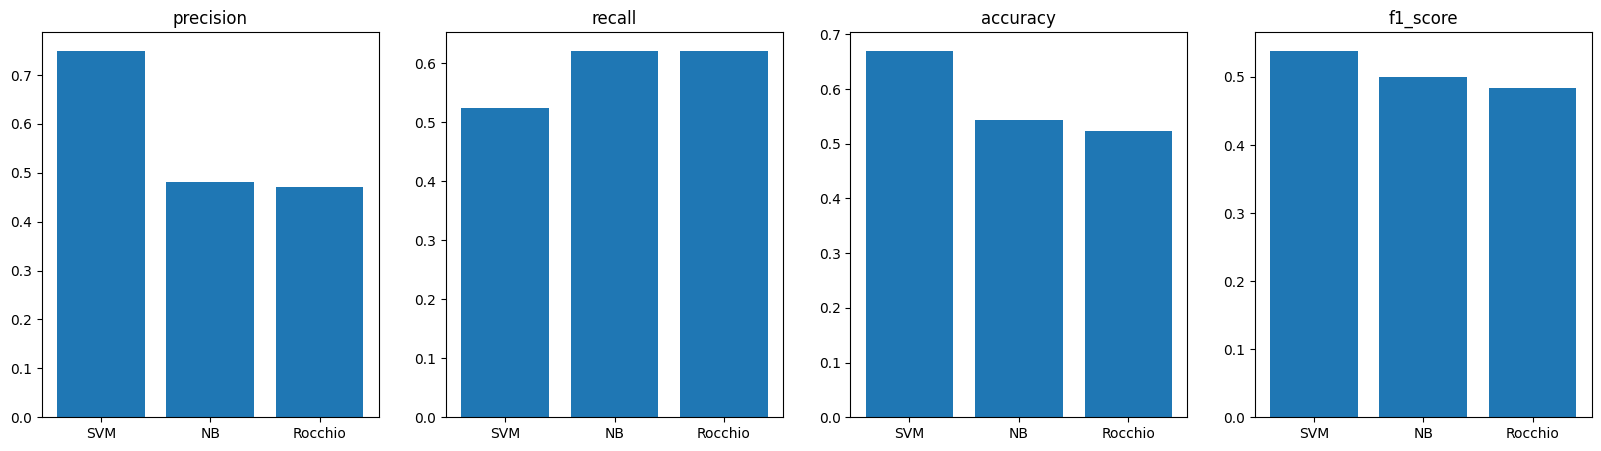

In [25]:
# TODO: Plot evaulations

plt.figure().set_size_inches(20, 5)
plt.subplot(1, 4, 1)
plt.title('precision')
plt.bar(['SVM', 'NB', 'Rocchio'], [precision(Y_test, SVM_prediction), precision(Y_test, NB_prediction), precision(Y_test, rocchio_prediction)])
plt.subplot(1, 4, 2)
plt.title('recall')
plt.bar(['SVM', 'NB', 'Rocchio'], [recall(Y_test, SVM_prediction), recall(Y_test, NB_prediction), recall(Y_test, rocchio_prediction)])
plt.subplot(1, 4, 3)
plt.title('accuracy')
plt.bar(['SVM', 'NB', 'Rocchio'], [accuracy(Y_test, SVM_prediction), accuracy(Y_test, NB_prediction), accuracy(Y_test, rocchio_prediction)])
plt.subplot(1, 4, 4)
plt.title('f1_score')
plt.bar(['SVM', 'NB', 'Rocchio'], [f1_score(Y_test, SVM_prediction), f1_score(Y_test, NB_prediction), f1_score(Y_test, rocchio_prediction)])
plt.show()


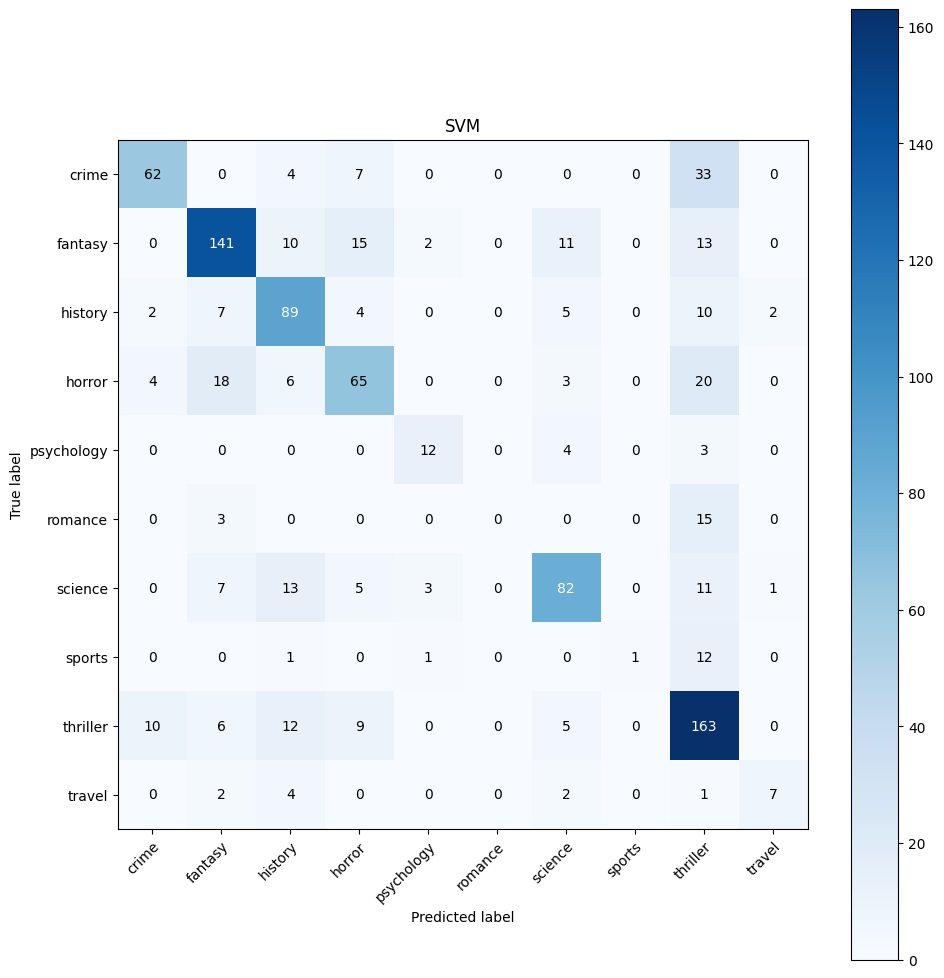

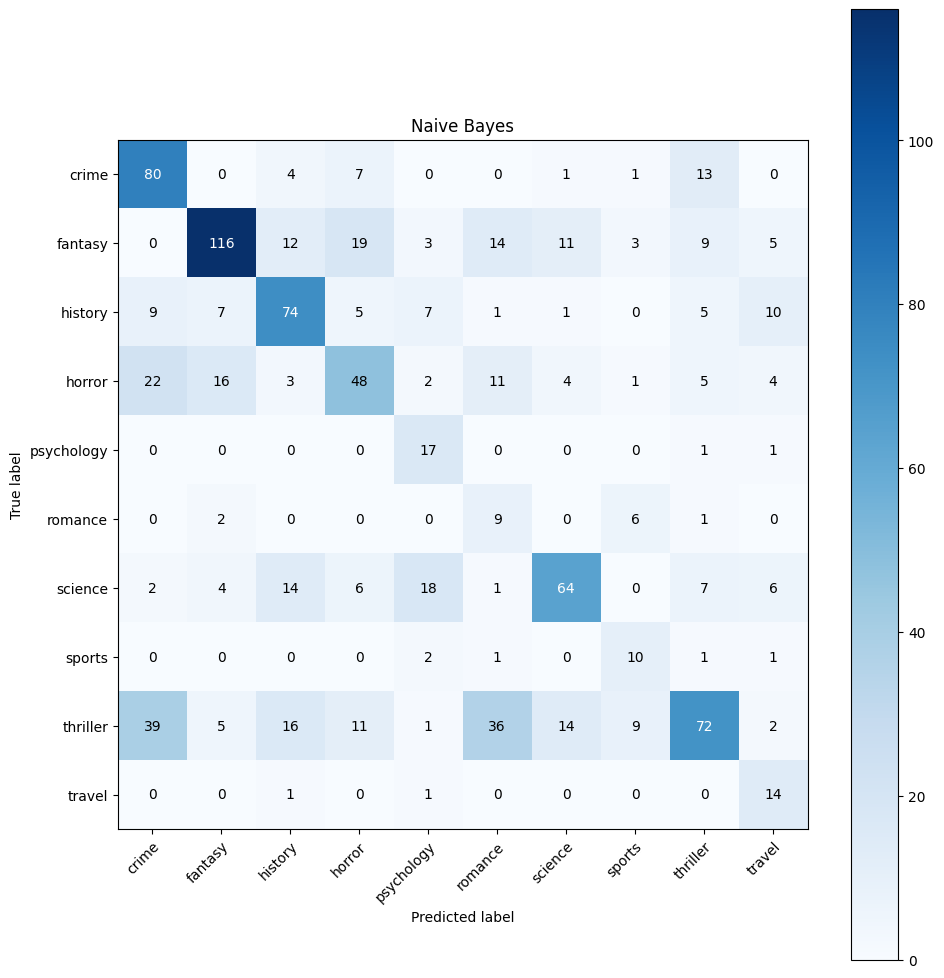

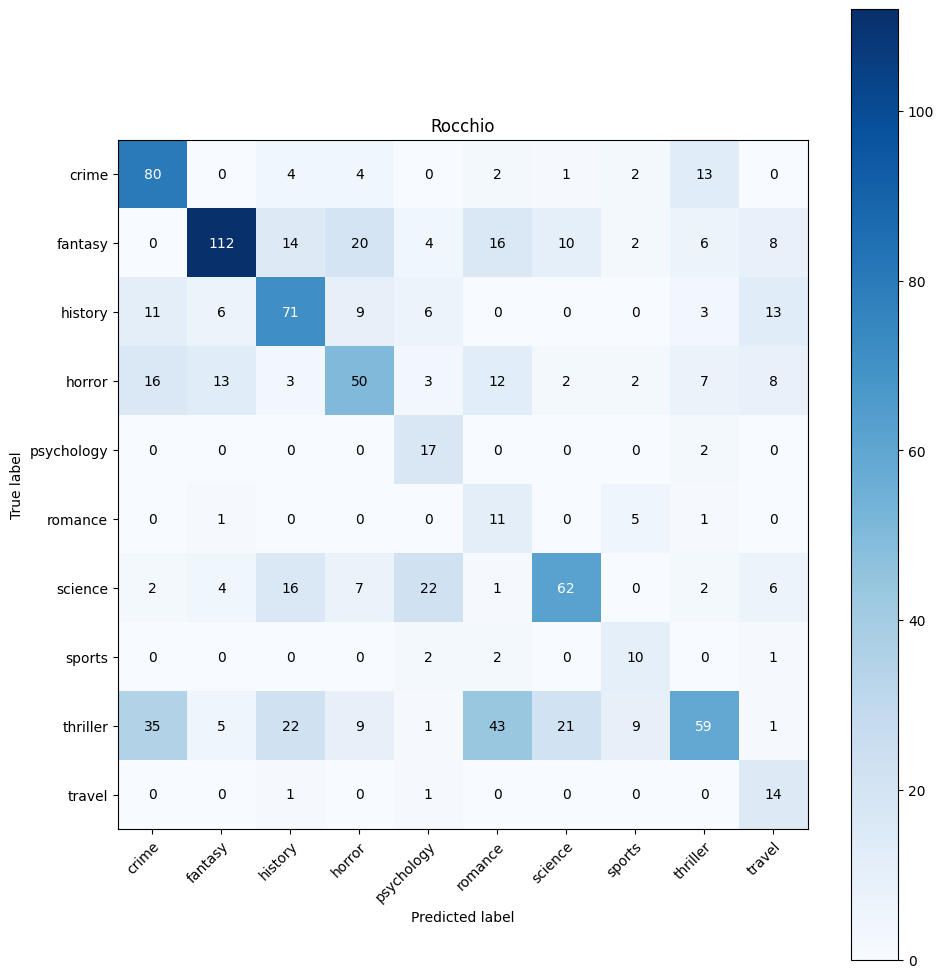

In [26]:
# TODO: Draw confusion matrix

def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion matrix'):
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    category_list = df.genre.astype('category').cat.categories.to_list()
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=category_list, yticklabels=category_list, title=title, ylabel='True label', xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(Y_test, SVM_prediction, labels=np.unique(Y_test), title='SVM')
plot_confusion_matrix(Y_test, NB_prediction, labels=np.unique(Y_test), title='Naive Bayes')
plot_confusion_matrix(Y_test, rocchio_prediction, labels=np.unique(Y_test), title='Rocchio');

<div dir="rtl">
کدام مدل از همه دقیق‌تر عمل کرد؟ نتیجه‌گیری و تحلیل خود از نتایج ارزیابی را گزارش دهید.
</div>

<span style="color: red;">#TODO: Write your answer in here.</span>
<div dir="rtl">
قاعدتا با توجه به اینکه مدل
SVM
در مقایسه با دو مدل دیگر پیچیده تر است و بهتر میتواند داده های چند بعدی را
classify
کند پس دقیق تر عمل میکند که  بر اساس
metric
های بدست آمده نیز این موضوع مشخص است
.

علت عملکرد بد تر در مدل
Naive Bayes
را میتوان در این دید که این مدل پارامتر های مختلف را مستقل و تابع توزیع نمرال فرض میکند که در این مسئله همچین فرضی میتواند غلط باشد
.

علت عملکرد بدتر در مدل
Rocchio
هم میتواند این باشد که هدف این مدل یافتن مراکزی است که داده های مشابه به آن نزدیک تر اند و در این مسئله با توجه به اینکه ژانر های مختلف شباهت های زیادی دارند و میتوانند 
overlapping
داشته باشند و صرفا فاصله نمیتواند ملاک کافی برای تشخیص باشد
.

همانطور که در نتایج هم مشخص است مدل
SVM
به جز در مورد
recall
عملرد بهتری نشان داده و خطای عمده آن هم با توجه به ماتریس
confusion
به خاطر این است که نتوانسته فرق بین ژانر
thriller
و ژانر های دیگر را در بعضی موارد متوجه شود که دلیل عمده این موضوع این است که این ژانر 
overlapping
زیادی با ژانر های دیگر الالخصوص ژانر
horror
و
crime
دارد
</div>

<div dir="rtl">
<h1>3. 
کاهش ابعاد و خوشه‌بندی متن
</h1>
</div>

<div dir="rtl">
<h2>3-1. 
کاهش ابعاد
</h2>
</div>

<div dir="rtl">
<h3>3-1-1. 
PCA
</h3>
یکی از روش‌های کاهش ابعاد، PCA است. با استفاده از پیاده‌سازی آن در کتابخانه sklearn، ابعاد ویژگی‌های X را کاهش دهید.
<br>
سپس با استفاده از explained_variance_ratio_ در الگوریتم PCA  نشان دهید که با وجود یک ترشولد 90 درصد تا چه میزان میتوان ابعاد ویژگی ها را کم تر کرد.
</div>

In [27]:
def reduce_dimension(embedding, n_components):
    """
    Performs dimensional reduction using PCA with n components left behind

    Parameters
    ----------
    embeddings : List
        A list of embeddings of documents
    
    n_components: int
        Number of components to keep

    Returns a list of reduced embeddings
    """
    # TODO
    sklearn_pca = sklearn.decomposition.PCA(n_components=n_components)
    sklearn_pca.fit(embedding)
    return sklearn_pca.transform(embedding), sklearn_pca

<div dir="rtl">
در این قسمت می‌توانید برای شهود بهتر، نمودار رسم کنید و همچنین برای ساده‌تر شدن کار، از pipeline‌های sklearn بهره ببرید. 
<br>
<i> انجام این کار‌ها صرفا توصیه است و اجباری نیست. </i>
</div>

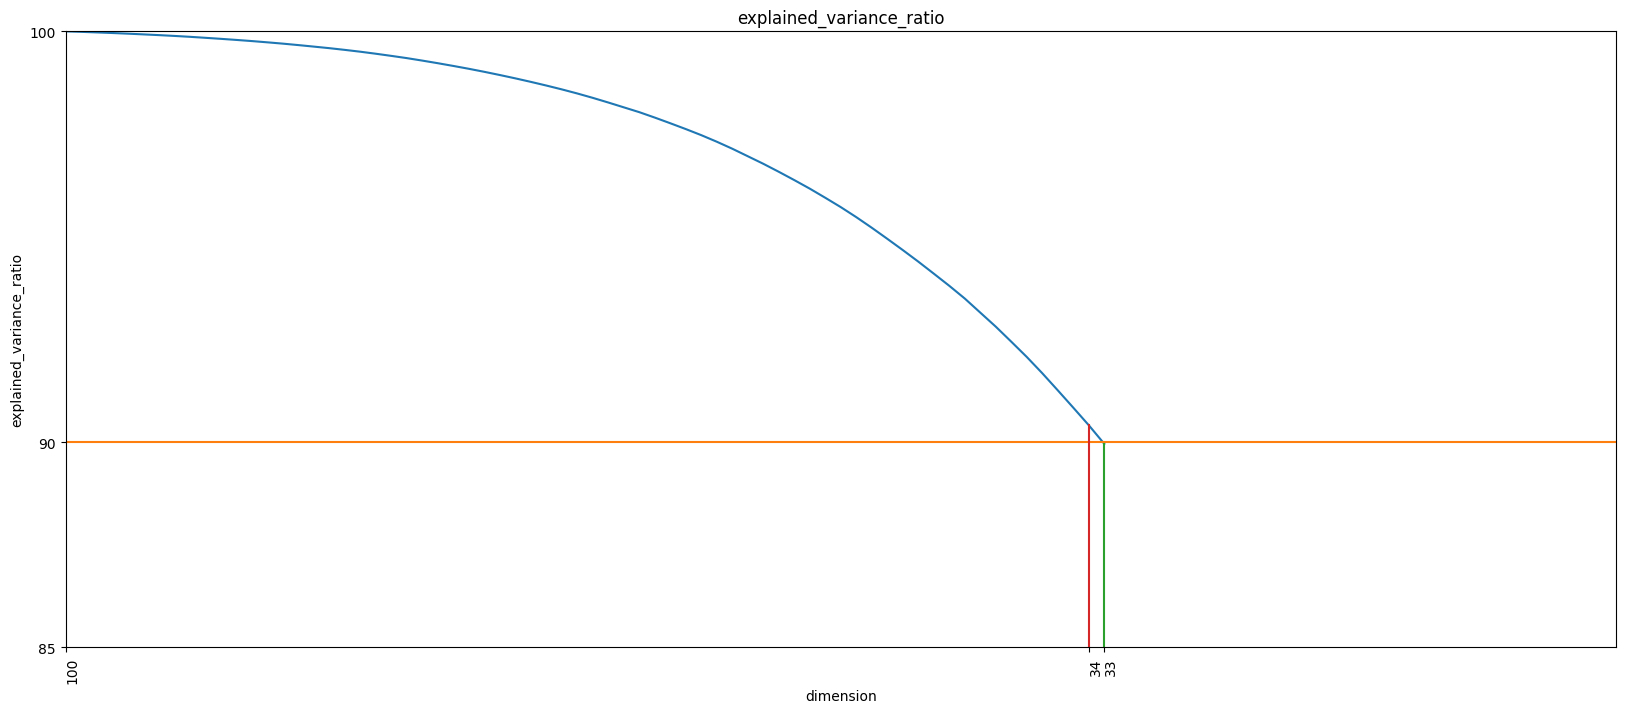

In [28]:
# TODO: Findout the most reduced dimension which has 90% cutoff explained variance. 

reduced_X = np.array(X.to_list())
explained_variance_ratio = [100]
dimension = [reduced_X.shape[1]]
PCA_model = None
while True:
    new_reduced_X, new_PCA_model = reduce_dimension(np.array(X.to_list()), reduced_X.shape[1]-1)
    dimension.append(new_reduced_X.shape[1])
    explained_variance_ratio.append(new_PCA_model.explained_variance_ratio_.sum() * 100)
    if explained_variance_ratio[-1] < 90:
        break
    PCA_model = new_PCA_model
    reduced_X = new_reduced_X
    
plt.figure().set_size_inches(20, 8)
plt.title('explained_variance_ratio')
plt.plot(dimension, explained_variance_ratio)
plt.plot([dimension[0], 0], [90, 90])
plt.plot([dimension[-1], dimension[-1]], [explained_variance_ratio[-1], 85])
plt.plot([dimension[-2], dimension[-2]], [explained_variance_ratio[-2], 85])
plt.xlim([100, 0])
plt.ylim([85, 100])
plt.xlabel('dimension')
plt.ylabel('explained_variance_ratio')
plt.xticks([100] + dimension[-2:])
plt.yticks([100, 90, 85])
plt.setp(plt.gca().get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.show()

X = reduced_X

<div dir="rtl">
<h3>3-1-2. 
TSNE
</h3>
<br>
     برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</div>


In [29]:
from typing import List
from sklearn.manifold import TSNE
def convert_to_2d_tsne(emb_vecs):
    """
    Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns a list of 2d vectors
    """

    # TODO: Convert each input vector to 2d vector 
    return TSNE(n_components=2).fit_transform(emb_vecs)

In [30]:
# TODO: Uncomment the following code
X_2d = convert_to_2d_tsne(X)

<div dir="rtl">
<h2>3-2. 
خوشه‌بندی
</h2>
</div>

<div dir="rtl">
<h3>3-2-1. 
K-Means
</h3>

<div dir="rtl">
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی می‌کنید.

</div>

In [123]:
def cluster_kmeans(emb_vecs, n_clusters):
    """
    Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors
    
    n_clusters: int
        Number of clusters

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    # TODO: Implement K-means method from scratch
    # You can't use sklearn.cluster.KMeans for clustering
    # implement kmeans clustering here
    emb_matrix = emb_vecs

    # Randomly initialize centroids
    initial_centroids = emb_matrix[np.random.choice(len(emb_matrix), n_clusters, replace=False)]

    for _ in range(50):  # You can adjust the number of iterations
        # Compute distances between data points and centroids
        # check if new_centroids is defined
        distances = np.apply_along_axis(lambda x: np.linalg.norm(x - initial_centroids, axis=1), 1, emb_matrix)

        # Assign each point to the closest centroid
        cluster_indices = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([emb_matrix[cluster_indices == k].mean(axis=0) for k in range(n_clusters)])
        initial_centroids = new_centroids
                
    return initial_centroids, cluster_indices

def kmeans_clusters_dominant_category(cluster_indices, y_array, n_clusters):
    translation_array = np.zeros(n_clusters)
    for i in range(n_clusters):
        real_category_indieces, real_category_index_counts = np.unique(y_array[cluster_indices == i], return_counts=True)
        translation_array[i] = real_category_indieces[np.argmax(real_category_index_counts)]

    return np.apply_along_axis(lambda x: translation_array[x], 0, cluster_indices)

<div dir="rtl">
 با استفاده از K-Means خوشه‌های اسناد را ایجاد کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های مختلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
</div>

In [64]:

def purity_score(y_true, y_pred):
    """
    Calculate the purity score for the given cluster assignments and ground truth classes
    
    y_true: list
        ground truth labels for each document
    
    y_pred: list
        predicted labels for each document
        
    Returns a purity score between 0.0 and 1.0 (higher is better)
    """
    #TODO
    n_clusters = np.max(y_pred) + 1
    purity = 0
    for i in range(n_clusters):
        real_category_indieces, real_category_index_counts = np.unique(y_true[y_pred == i], return_counts=True)
        purity += np.max(real_category_index_counts)
    purity /= len(y_true)
    return purity

def silhouette_score(X, y_pred):
    return sklearn.metrics.silhouette_score(X, y_pred, metric='euclidean')

In [65]:
# TODO: Calculate silhouette score and purity score
k = 10
centroids, cluster_indices = cluster_kmeans(X, k)
purity_score_value = purity_score(Y.to_numpy(), cluster_indices)
silhouette_score_value = silhouette_score(X, cluster_indices)
print(
f"""
k: {k}
purity_score: {purity_score_value}
silhouette_score: {silhouette_score_value}
"""
)


k: 10
purity_score: 0.534051724137931
silhouette_score: 0.09011092173468495



  0%|          | 0/13 [00:00<?, ?it/s]

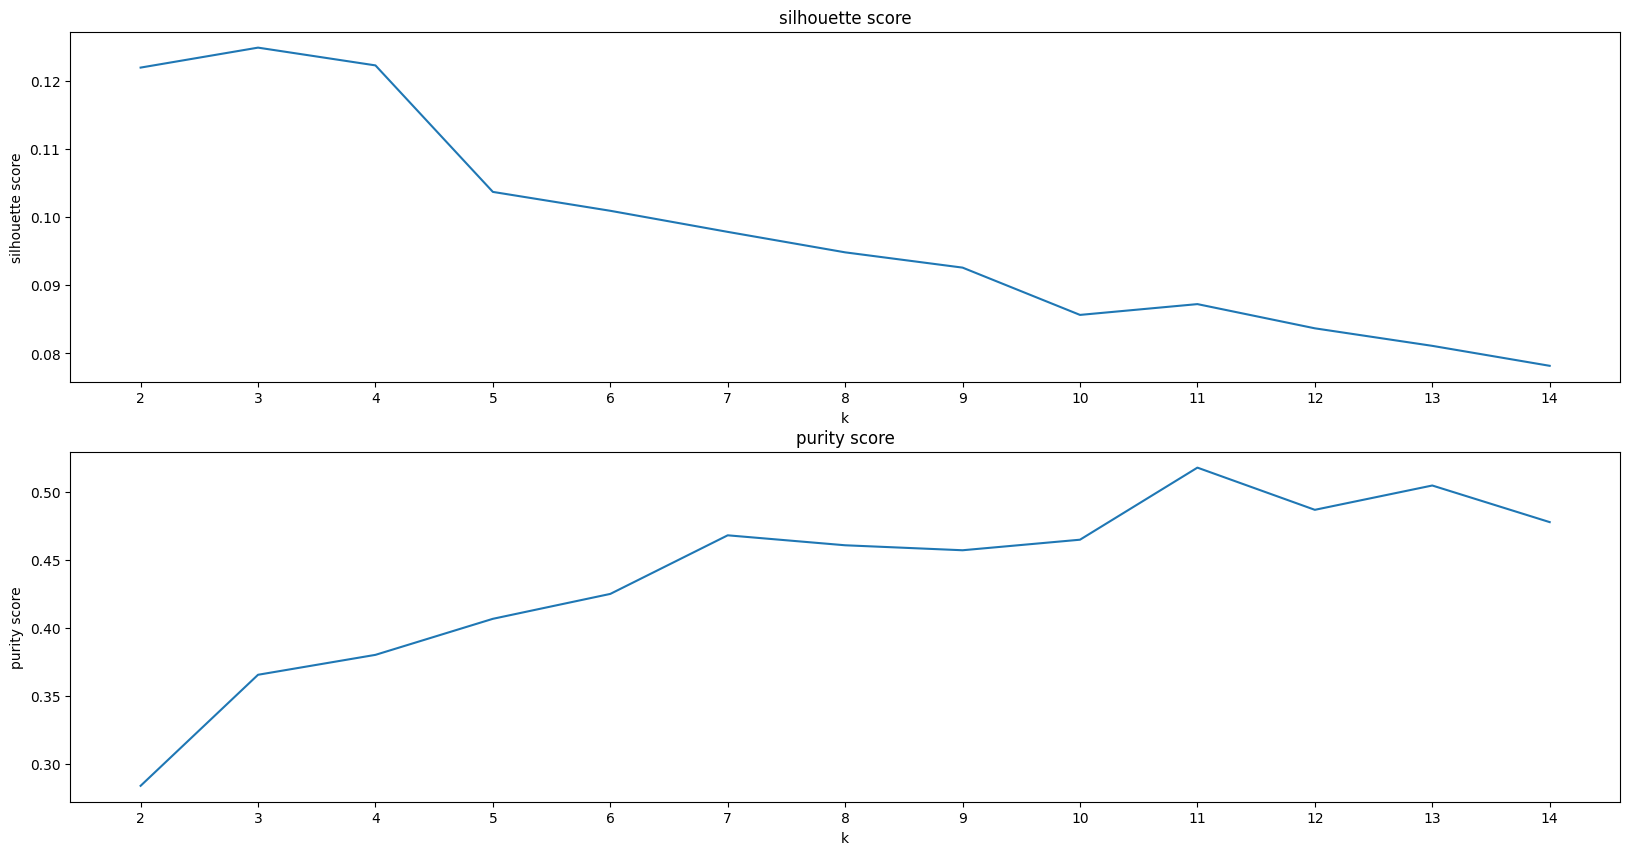

In [68]:
# TODO: Plot silhouette score for different value of k (at least 5 different k values)
# TODO: plot purity for different value of k (at least 5 different k values)

silhouette_scores = []
purity_scores = []
k_values = list(range(2, 15))
for k in tqdm(k_values):
    centroids, cluster_indices = cluster_kmeans(X, k)
    silhouette_scores.append(silhouette_score(X, cluster_indices))
    purity_scores.append(purity_score(Y.to_numpy(), cluster_indices))

    
plt.figure().set_size_inches(20, 10)
plt.subplot(2, 1, 1)
plt.title('silhouette score')
plt.plot(k_values, silhouette_scores)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(k_values)
plt.subplot(2, 1, 2)
plt.title('purity score')
plt.plot(k_values, purity_scores)
plt.xlabel('k')
plt.ylabel('purity score')
plt.xticks(k_values)
plt.show()


k: 4
purity_score: 0.38685344827586204
silhouette_score: 0.12026492233477692



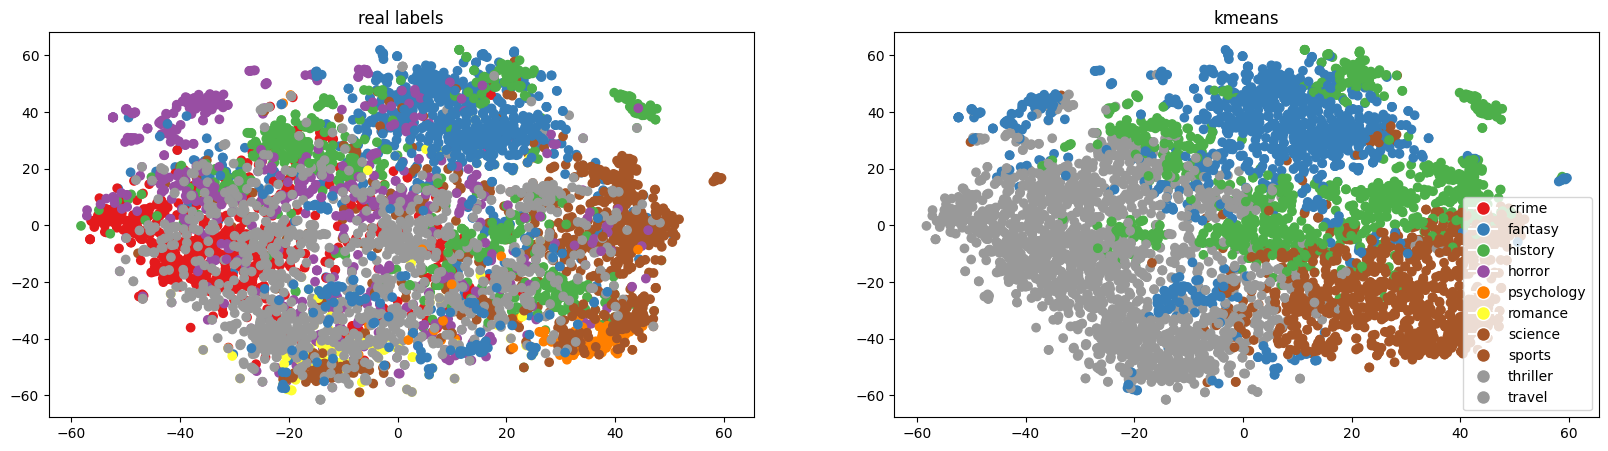

In [124]:
k = 4
centroids, cluster_indices = cluster_kmeans(X, k)
purity_score_value = purity_score(Y.to_numpy(), cluster_indices)
silhouette_score_value = silhouette_score(X, cluster_indices)

purity_score_value = purity_score(Y.to_numpy(), cluster_indices)
silhouette_score_value = silhouette_score(X, cluster_indices)
print(
f"""
k: {k}
purity_score: {purity_score_value}
silhouette_score: {silhouette_score_value}
"""
)

dominant_category = kmeans_clusters_dominant_category(cluster_indices, Y.to_numpy(), k)
genre_list = df.genre.astype('category').cat.categories.to_list()
genre_colors_list = plt.cm.Set1(np.linspace(0, 1, len(genre_list)))

plt.figure().set_size_inches(20, 5)
plt.subplot(1, 2, 1)
plt.title('real labels')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=np.apply_along_axis(lambda x: np.array(genre_colors_list)[x], 0, Y.to_numpy()))
plt.subplot(1, 2, 2)
plt.title('kmeans')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=np.apply_along_axis(lambda x: np.array(genre_colors_list)[np.int8(x)], 0, dominant_category))
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=genre_list[i], markerfacecolor=genre_colors_list[i], markersize=10) for i in range(len(genre_list))])
plt.show()


<div dir="rtl">
با استفاده از نمودارهای رسم شده توضیح دهید بهترین k برای انتخاب در داده ما با استفاده از الگوریتم K-Means چیست؟
چرا؟
</div>

<span style="color: red;">#TODO: Write your answer in here.</span>
<div dir="rtl">
قائدتا هرچقدر مقدار
silhouette score
بیشتر باشد یعنی داده ها داخل یک
cluster
ارتباط معنادار تری دارند و به داده های
cluster
های دیگر غیر مرتبط ترند که با توجه به نمودار
silhouette score
این مقدار برای
k
از
۲
تا
۴
بیشتر است ولی باتوجه به اینکه در این مسئله داده های ما
label
دارند پس مقدار
purity
دسته بندی به دست آمده نیز برای ما حائز اهمیت است که این مقدار برای
k
های از
۱۱
تا
۱۳
به حداکثر میرسد

اما دقت کنید که با زیاد شدن
purity
از 
k
برابر با
۴
تا
۱۴
مقدار
silhouette score
مرتبا کاهش میابد که این موضوع نشان میدهد که به نوعی مدل
k-means
ما در حال
overfit
شدن روی این داده هاست چون داده ها را بهتر تقسیم نکرده ولی
purity
افزایش یافته است

پس میتوان اینگونه فرض کرد که اگر میخواهیم روی داده ها
overfit
نشویم باید یکی از مقادیر
۳
یا
۴
را برای
k
برگیزینیم
</div>

<div dir="rtl">
<h3>3-2-2. 
Hierarchical clustering
</h3>
</div>

<div dir="rtl">
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</div>

  0%|          | 0/13 [00:00<?, ?it/s]

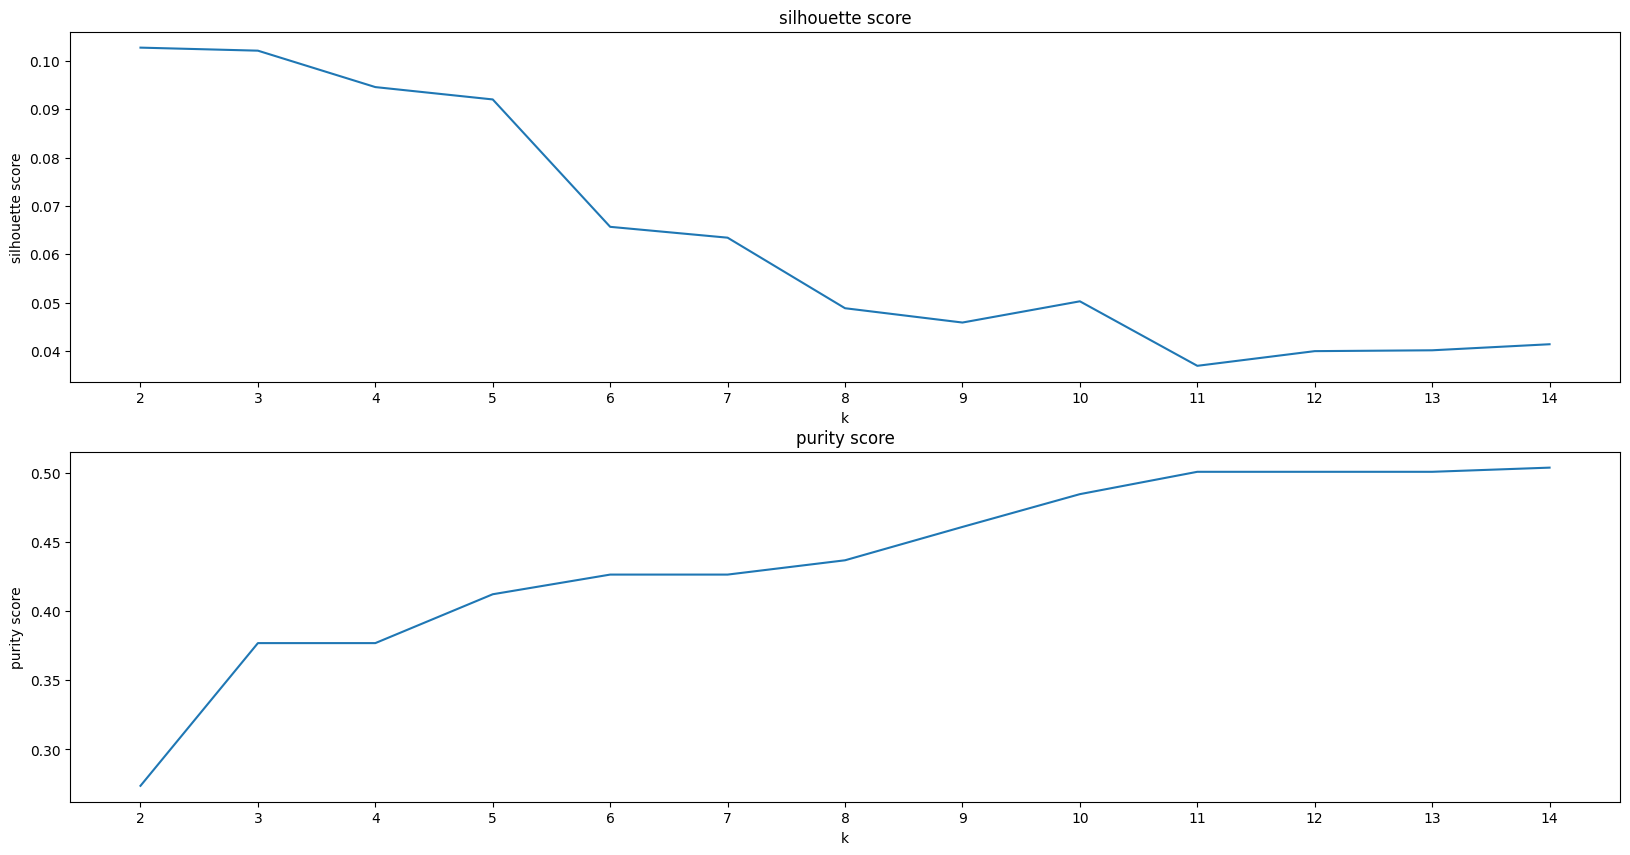

In [134]:
# TODO: Perform hierarchical clustering on X

import scipy.cluster.hierarchy as sch
silhouette_scores = []
purity_scores = []
k_values = list(range(2, 15))
for k in tqdm(k_values):
    scipy_hierarchical_clustering = sch.linkage(X, method='ward')
    labels = sch.fcluster(scipy_hierarchical_clustering, k, criterion='maxclust') - 1
    silhouette_scores.append(silhouette_score(X, labels))
    purity_scores.append(purity_score(Y.to_numpy(), labels))

    
plt.figure().set_size_inches(20, 10)
plt.subplot(2, 1, 1)
plt.title('silhouette score')
plt.plot(k_values, silhouette_scores)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(k_values)
plt.subplot(2, 1, 2)
plt.title('purity score')
plt.plot(k_values, purity_scores)
plt.xlabel('k')
plt.ylabel('purity score')
plt.xticks(k_values)
plt.show()



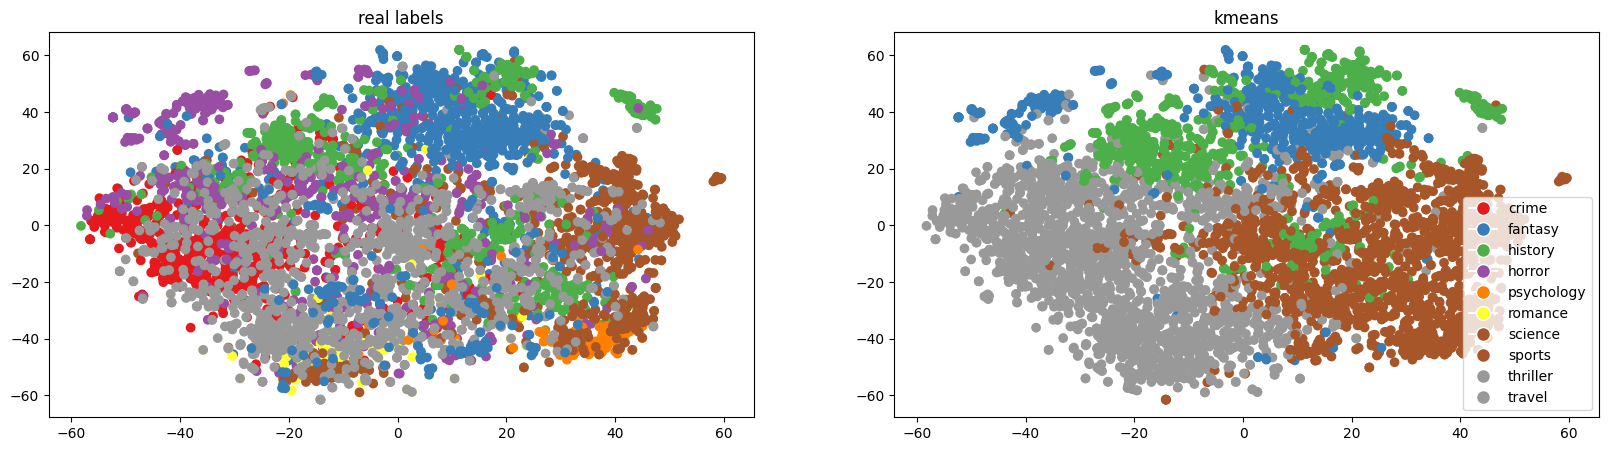

In [142]:
k = 5
scipy_hierarchical_clustering = sch.linkage(X, method='ward')
labels = sch.fcluster(scipy_hierarchical_clustering, k, criterion='maxclust') - 1

dominant_category = kmeans_clusters_dominant_category(labels, Y.to_numpy(), k)
genre_list = df.genre.astype('category').cat.categories.to_list()
genre_colors_list = plt.cm.Set1(np.linspace(0, 1, len(genre_list)))

plt.figure().set_size_inches(20, 5)
plt.subplot(1, 2, 1)
plt.title('real labels')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=np.apply_along_axis(lambda x: np.array(genre_colors_list)[x], 0, Y.to_numpy()))
plt.subplot(1, 2, 2)
plt.title('kmeans')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=np.apply_along_axis(lambda x: np.array(genre_colors_list)[np.int8(x)], 0, dominant_category))
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=genre_list[i], markerfacecolor=genre_colors_list[i], markersize=10) for i in range(len(genre_list))])
plt.show()



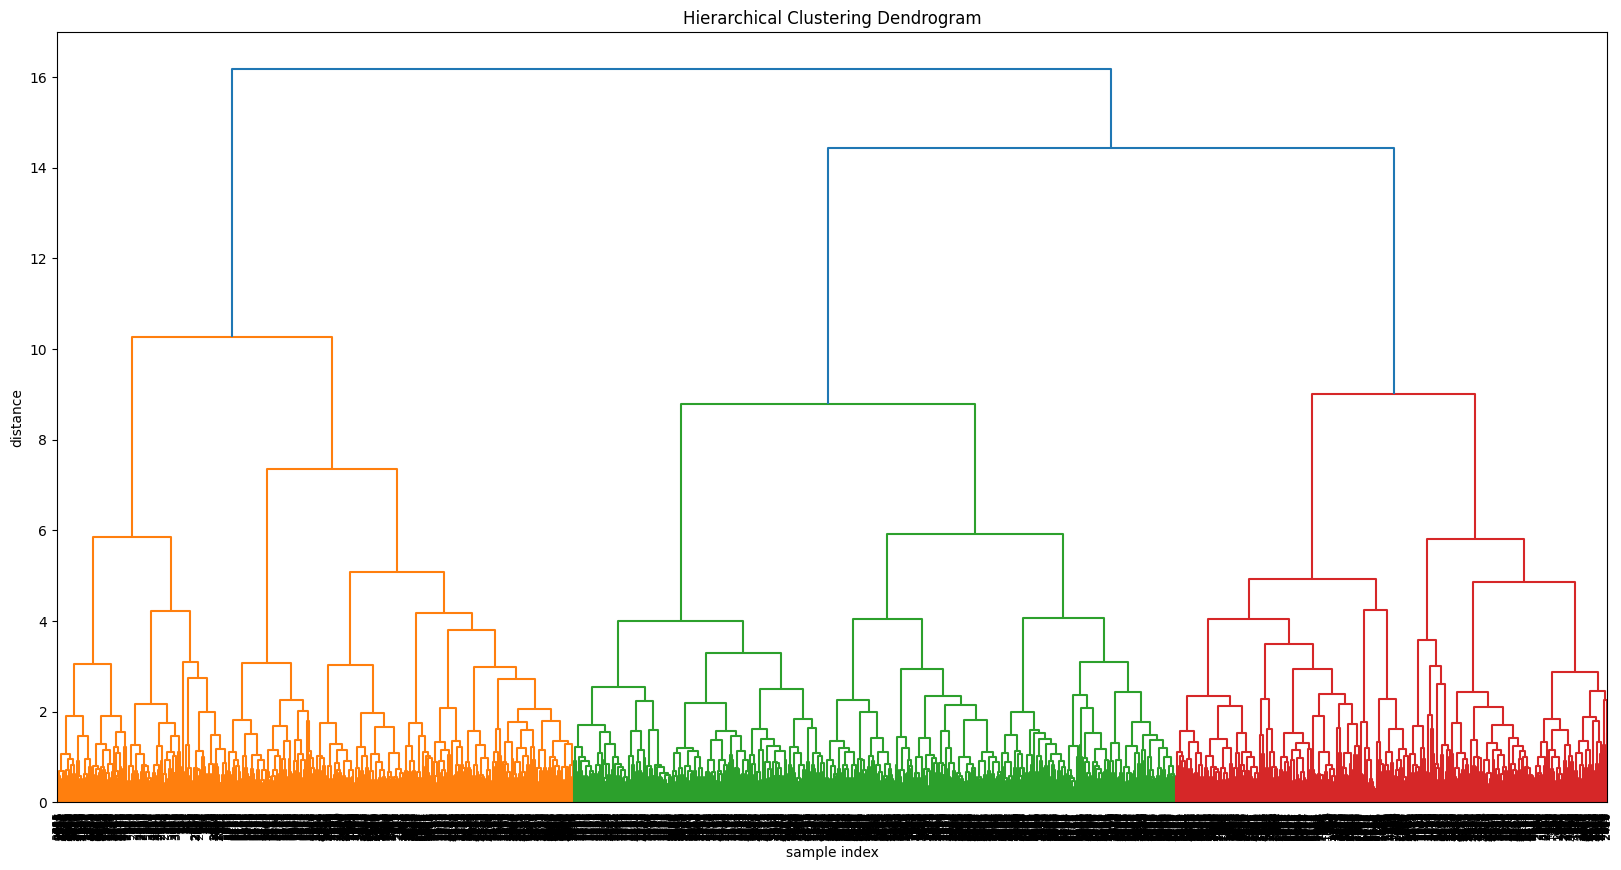

In [141]:
# TODO: Plot dendrogram

plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
sch.dendrogram(scipy_hierarchical_clustering, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.show()